# Notebook 5 - Optimization and neural networks



In [3]:
import copy
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize
import torch
import time

## Optimization

In this session we will talk about optimization in general and its application to machine learning.

First we will look into a general setting. Let us simply minimize the function :
 $ f(x) = x^2 $ when starting from $x_0=2$

 A one-liner for that is to use scipy.optimize

In [4]:
# Définir la fonction f(x) qui retourne le carré de x
def f(x):
    return x ** 2

# Définir une valeur initiale pour commencer l'optimisation
x_0 = 2

# Utiliser la fonction 'minimize' pour trouver la valeur de x qui minimise f(x)
# La fonction commence à x_0 et cherche le minimum
result = scipy.optimize.minimize(f, x_0)

# Extraire la valeur de x qui minimise la fonction
# Cela devrait être proche de zéro pour cette fonction
result.x

array([-1.88846401e-08])

### Implementing a random search

A first possible algorithm is to sample a change for x and keep the best value.
We iterate the following steps :
- take a neighbor for x, sampling a random number with standard variation 0.01.
- evaluate these two possibilities
- move to the best one

Implement that with a for loop with 1000 iterations.

7.453184688826836e-05


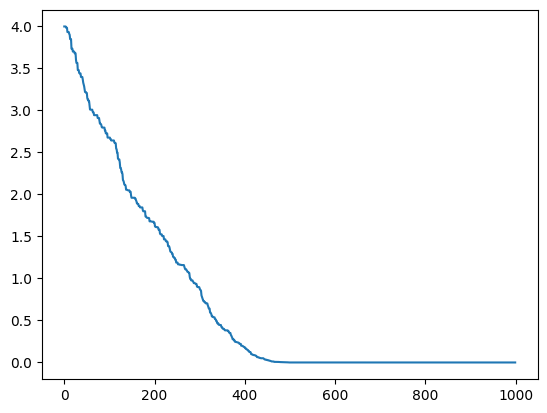

In [5]:
# Définir le nombre d'itérations pour l'algorithme d'optimisation
n_iter = 1000

# Initialiser x avec la valeur initiale x_0
x = x_0

# Créer une liste pour stocker tous les résultats de la fonction au cours des itérations
all_results = list()

# Définir une fonction qui échantillonne autour de la valeur actuelle de x
# Elle ajoute un bruit gaussien avec un écart-type de 0.01
def sample_around(x):
    return x + np.random.normal(scale=0.01)

# Boucle sur le nombre d'itérations spécifié
for _ in range(n_iter):
    # Échantillonner autour de la valeur actuelle de x
    sample = sample_around(x)

    # Calculer les valeurs de la fonction pour x et l'échantillon
    f_x, f_sample = f(x), f(sample)

    # Si la valeur de la fonction pour l'échantillon est inférieure à celle de x
    # alors mettre à jour x avec la valeur de l'échantillon
    if f_sample < f_x:
        x = sample
        all_results.append(f_sample)
    # Sinon, conserver la valeur actuelle de x
    else:
        x = x
        all_results.append(f_x)

# Afficher la valeur finale de x après toutes les itérations
print(x)

# Tracer les valeurs de la fonction au cours des itérations
plt.plot(all_results)


### Implementing an exaustive search

A first possible algorithm is to try all changes for x and keep the best value.
We iterate the following steps :
- try a smaller and a larger x value of 0.01.
- evaluate these two possibilities
- move to the best one

Implement that with a for loop with 1000 iterations.

-1.6410484082740595e-15


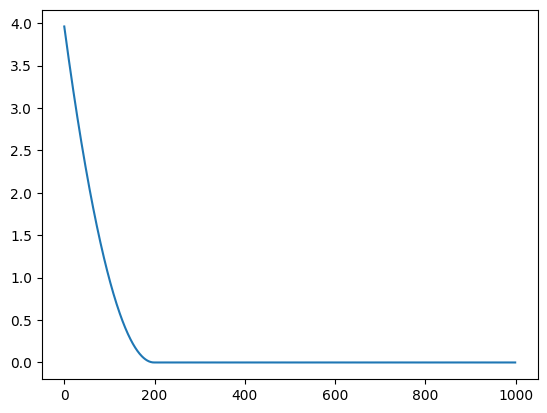

In [6]:
n_iter = 1000
x = x_0
all_results = list()

for _ in range(n_iter):
    # Calculer deux nouvelles valeurs autour de x : une plus petite et une plus grande
    smaller, larger = x - 0.01, x + 0.01

    # Calculer les valeurs de la fonction pour ces deux nouvelles valeurs
    f_small, f_large = f(smaller), f(larger)

    # Si la valeur de la fonction pour la valeur plus petite est inférieure à celle de la valeur plus grande
    # alors mettre à jour x avec la valeur plus petite
    if f_small < f_large:
        x = smaller
        all_results.append(f_small)
    # Sinon, mettre à jour x avec la valeur plus grande
    else:
        x = larger
        all_results.append(f_large)


print(x)
plt.plot(all_results)

### Implementing a gradient descent 'by hand'
Now let us implement the gradient descent, by remembering that $\frac{df}{dx} = 2x$

We iterate the following steps :
- compute the gradient value at x
- Update x : $x \leftarrow x - 0.01 \frac{df}{dx}$

Implement that with a for loop with 1000 iterations.

0.270616430555459


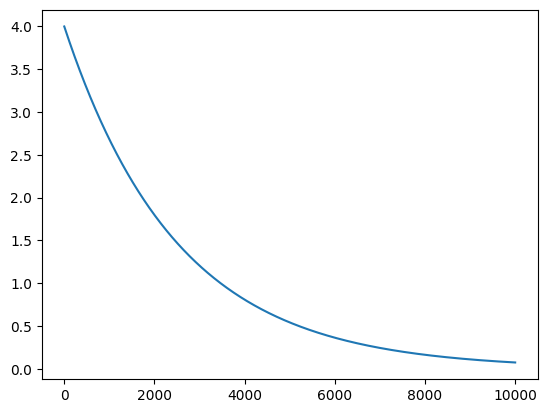

In [7]:
# Définir la dérivée de la fonction f(x) = x^2, qui est df(x) = 2x
def df(x):
    return 2 * x


all_results = list()
n_iter = 10000
x = x_0
for _ in range(n_iter):
    # Calculer la dérivée de la fonction à la position actuelle de x
    dx = df(x)

    # Mettre à jour x en utilisant la méthode de descente de gradient
    # On soustrait un petit multiple de la dérivée pour se déplacer vers le minimum
    x = x - 0.0001 * dx

    # Ajouter la valeur de la fonction à la position actuelle de x à la liste des résultats
    all_results.append(f(x))

print(x)
plt.plot(all_results)

### Implementing a gradient descent with automatic differentiation (by hand)

We want to use the same algorithm but without knowing the formula of differentiation.
We instead want to rely on Pytorch

Below is the implementation of the same method as before, with PyTorch.

Can you confirm that we get the same results ?

3.3659321996282188e-09


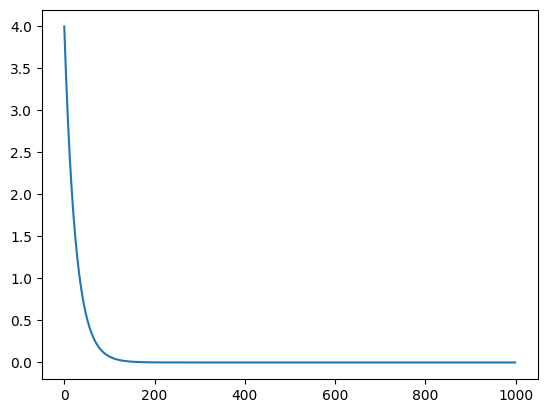

In [ ]:
all_results = list()
n_iter = 1000

# Initialiser x comme un tenseur PyTorch avec une valeur initiale de 2.0
# L'argument requires_grad=True permet de calculer les gradients pour ce tenseur
x = torch.tensor(2.0, requires_grad=True)

for i in range(n_iter):

    # Calculer la valeur de la fonction f(x) = x^2
    f_x = x ** 2

    # Calculer le gradient de f_x par rapport à x
    f_x.backward()

    # Mettre à jour x en utilisant la méthode de descente de gradient
    # On soustrait un petit multiple du gradient pour se déplacer vers le minimum
    x.data = x - 0.01 * x.grad.item()

    # Réinitialiser le gradient à None pour éviter l'accumulation des gradients
    x.grad = None

    # Ajouter la valeur de la fonction à la position actuelle de x à la liste des résultats
    all_results.append(f_x.data)

print(x.item())
plt.plot(all_results)

### Implementing a gradient descent with automatic differentiation (the proper way)

3.365942857769255e-09


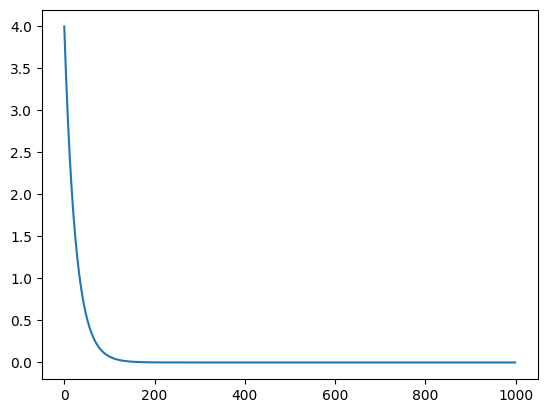

In [ ]:
all_results = list()
n_iter = 1000
x = torch.tensor(2.0, requires_grad=True)

# Créer un optimiseur SGD (Stochastic Gradient Descent) avec un taux d'apprentissage de 0.01
# Le paramètre momentum est défini à 0, donc il n'est pas utilisé ici
opt = torch.optim.SGD([x], lr=0.01, momentum=0)

for i in range(n_iter):
    # Calculer la valeur de la fonction f(x) = x^2
    f_x = f(x)

    # Calculer le gradient de f_x par rapport à x
    f_x.backward()

    # Mettre à jour x en utilisant l'optimiseur SGD
    opt.step()

    # Réinitialiser les gradients à zéro pour éviter l'accumulation des gradients
    opt.zero_grad()
    all_results.append(f_x.data)

print(x.item())
plt.plot(all_results)

## Bigger input space

Let us now look at a more complicated input space, the function takes as input five numbers and returns :
$f_2(x_1, x_2, x_3, x_4, x_5) = (x_1 + x_2 + x_3 + x_4 + x_5)^2$

Now it is more costly to find the right direction randomly. Try the random algorithm on this new function.

In [8]:
# Définir une fonction f_2 qui prend un vecteur x en entrée
# et retourne le carré de la somme de ses éléments
def f_2(x):
    return (x[0] + x[1] + x[2] + x[3] + x[4]) ** 2


new_x_0 = (1, 2, 3, 4, 5)
f_2(new_x_0)

225

[-2.36340966 -1.47890825  0.2742626   1.55721392  2.01084002]


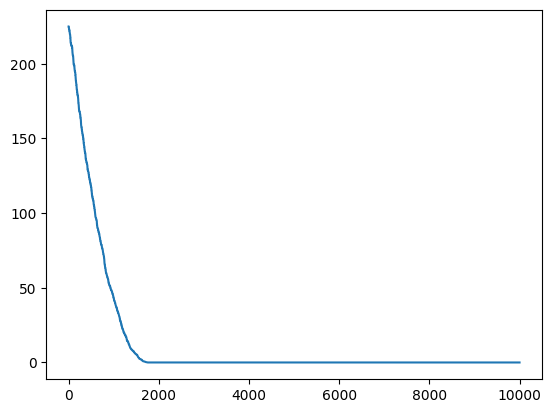

In [9]:
n_iter = 10000
x = new_x_0
all_results = list()

# Définir une fonction qui échantillonne autour de la valeur actuelle de x
# Elle ajoute un bruit gaussien avec un écart-type de 0.01 à chaque composante de x
def sample_around(x):
    return x + np.random.normal(size=5, scale=0.01)


for _ in range(n_iter):
     # Échantillonner autour de la valeur actuelle de x
    sample = sample_around(x)

    f_x, f_sample = f_2(x), f_2(sample)

    # Si la valeur de la fonction pour l'échantillon est inférieure à celle de x
    # alors mettre à jour x avec la valeur de l'échantillon
    if f_sample < f_x:
        x = sample
        all_results.append(f_sample)
    # Sinon, conserver la valeur actuelle de x
    else:
        x = x
        all_results.append(f_x)

print(x)
plt.plot(all_results)

Now let us try the gradient approach.

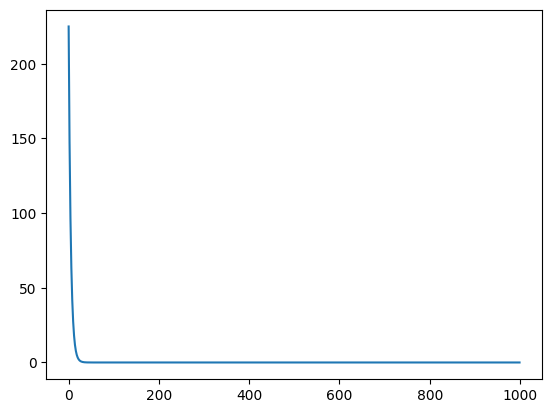

In [ ]:
all_results = list()
n_iter = 1000
x = torch.tensor(new_x_0, requires_grad=True, dtype=float)
opt = torch.optim.SGD([x], lr=0.01, momentum=0)

for i in range(n_iter):
    f_x = f_2(x)
    f_x.backward()
    opt.step()
    opt.zero_grad()
    all_results.append(f_x.data)

plt.plot(all_results)

## Actual machine learning examples


Now instead of minimizing random functions, let us minimize the error of a linear model !

We will use generated data (that I used during my class) : we simulate a hidden relationship (base_function) by sampling input-output pairs with noise.

Let us generate the data once again and plot it.

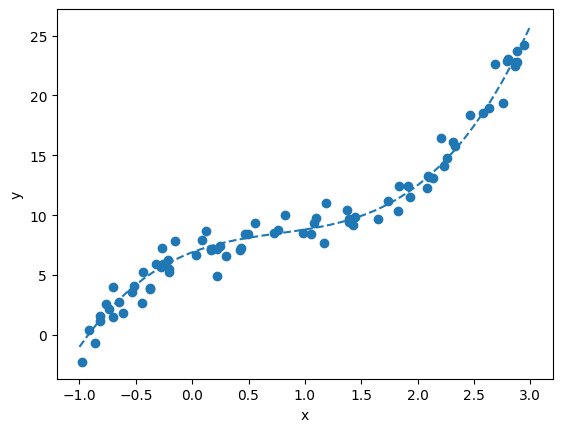

In [10]:
import numpy as np

# Définir une graine pour le générateur de nombres aléatoires afin de garantir la reproductibilité
np.random.seed(42)

# Définir la fonction de base que nous allons échantillonner
def base_function(x):
    y = 1.3 * x ** 3 - 3 * x ** 2 + 3.6 * x + 6.9
    return y

# Définir les bornes inférieure et supérieure pour les valeurs de x
low, high = -1, 3

# Définir le nombre de points à échantillonner
n_points = 80

# Générer des valeurs aléatoires uniformément distribuées entre 'low' et 'high'
# Chaque valeur est mise sous forme de tableau 2D avec une seule colonne
xs = np.random.uniform(low, high, n_points)[:, None]

# Calculer les valeurs de la fonction de base pour les points échantillonnés
sample_ys = base_function(xs)

# Ajouter du bruit gaussien aux valeurs échantillonnées
ys_noise = np.random.normal(size=(len(xs), 1))
noisy_sample_ys = sample_ys + ys_noise

# Créer une série de points linéairement espacés entre 'low' et 'high'
# Chaque point est mis sous forme de tableau 2D avec une seule colonne
lsp = np.linspace(low, high)[:, None]

# Calculer les valeurs de la fonction de base pour ces points linéairement espacés
true_ys = base_function(lsp)

# Tracer la fonction de base en pointillés
plt.plot(lsp, true_ys, linestyle='dashed')

# Tracer les échantillons bruitées
plt.scatter(xs, noisy_sample_ys)

# Ajouter des étiquettes aux axes
plt.xlabel('x')
plt.ylabel('y')

# Afficher le graphique
plt.show()

### Gradient descent using torch.
First create a torch version of these objects.

We specify a float32 dtype for our objects.

In [11]:
# Convertir le tableau NumPy 'noisy_sample_ys', 'xs' et 'lsp' en un tenseur PyTorch de type float
# Cela permet d'utiliser les fonctionnalités de PyTorch pour les calculs ultérieurs

torch_noisy_sample_ys = torch.from_numpy(noisy_sample_ys).float()
torch_xs = torch.from_numpy(xs).float()
torch_lsp = torch.from_numpy(lsp).float()


Let us try to fit a linear model by hand, instead of simply relying on scikit-learn !

The model of a linear regression is : $f_\theta (x) = (\theta_1 x + \theta_0)$

Careful ! We do not want to minimize the function of x itself.

We want to minimise the errors we make, also called the loss function. We will do this by adjusting the parameters $\theta$ of the function, starting from an arbitrary value of (1,1). This loss function is the sum of the square errors at each point :

$$ \min_{\theta}\mathcal{L} (\theta) = 1/N\sum_i (y_i - f_{\theta} (x_i))^ 2 \\
= 1/N\sum_i (y_i - (\theta_1 x_i + \theta_0))^ 2 $$

In [12]:
# Définir une fonction f_theta qui représente une droite d'équation y = theta[1] * x + theta[0]
# Elle prend en entrée un tenseur x et un tenseur de paramètres theta
def f_theta(x, theta):
    return theta[1] * x + theta[0]

# Définir une fonction de perte (loss function) qui calcule l'erreur quadratique moyenne
# entre les valeurs prédites par f_theta et les valeurs bruitées (torch_noisy_sample_ys)
def loss_function(theta):
    return torch.mean((torch_noisy_sample_ys - f_theta(torch_xs, theta)) ** 2)

# Initialiser les paramètres theta avec des valeurs initiales (1.0, 1.0)
# requires_grad=True permet de calculer les gradients pour ces paramètres
initial_theta = torch.tensor((1., 1.), requires_grad=True)

# Calculer la valeur initiale de la fonction de perte avec les paramètres initiaux
initial_loss = loss_function(initial_theta)
print(initial_loss)

tensor(84.6089, grad_fn=<MeanBackward0>)


tensor([5.4648, 4.7578])


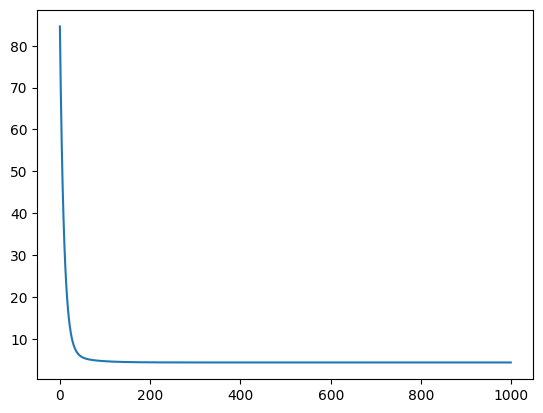

In [13]:
all_results = list()
n_iter = 1000

theta = copy.deepcopy(initial_theta)
opt = torch.optim.SGD([theta], lr=0.01, momentum=0.0)

for i in range(n_iter):
    loss_value = loss_function(theta)
    loss_value.backward()
    opt.step()
    opt.zero_grad()
    all_results.append(loss_value.data)

print(theta.data)
plt.plot(all_results)

We have values for the parameters now.
Let us look at what they look like.

Use the theta_function on the linspace to plot your model.

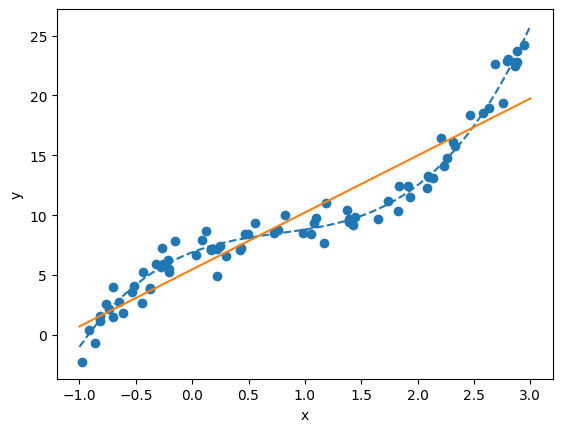

In [ ]:
# Calculer les valeurs prédites par le modèle linéaire f_theta pour les points linéairement espacés (torch_lsp)
# .detach() est utilisé pour détacher le tenseur du graphe de calcul, ce qui signifie que les opérations suivantes
# ne seront pas suivies pour le calcul des gradients
# .numpy() convertit le tenseur PyTorch en un tableau NumPy pour le tracé
predicted_ys = f_theta(torch_lsp, theta).detach().numpy()

# Tracer la fonction de base originale en pointillés
plt.plot(lsp, true_ys, linestyle='dashed')

# Tracer les valeurs prédites par le modèle linéaire
plt.plot(lsp, predicted_ys)

# Tracer les échantillons bruitées
plt.scatter(xs, noisy_sample_ys)

plt.xlabel('x')
plt.ylabel('y')
plt.show()

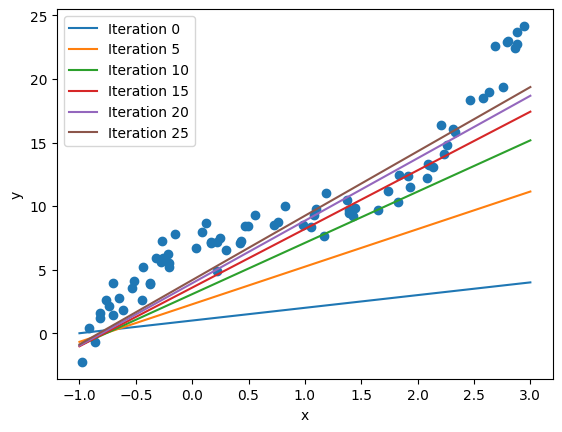

In [ ]:
# Initialiser les paramètres theta avec des valeurs initiales (1.0, 1.0)
# requires_grad=True permet de calculer les gradients pour ces paramètres
theta_0 = torch.tensor((1., 1.), requires_grad=True)

n_iter = 30
opt = torch.optim.SGD([theta_0], lr=0.02, momentum=0.0)

for i in range(n_iter):
    # Tous les 5 itérations, tracer les valeurs prédites par le modèle linéaire
    # on utilise 'i' on n'utilise pas '_'
    if i % 5 == 0:
        predicted_ys = f_theta(torch_lsp, theta_0).detach().numpy()
        plt.plot(lsp, predicted_ys, label='Iteration {}'.format(i))

    loss_value = loss_function(theta_0)
    loss_value.backward()
    opt.step()
    opt.zero_grad()

# Tracer les échantillons bruitées
plt.scatter(xs, noisy_sample_ys)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
# Sauvegarder le graphique sous forme d'image avec une haute résolution
plt.savefig("iterations.png", dpi=600)
plt.show()



## Deep Learning with PyTorch

We start by training a small MLP using built-in functionalities in scikit-learn:

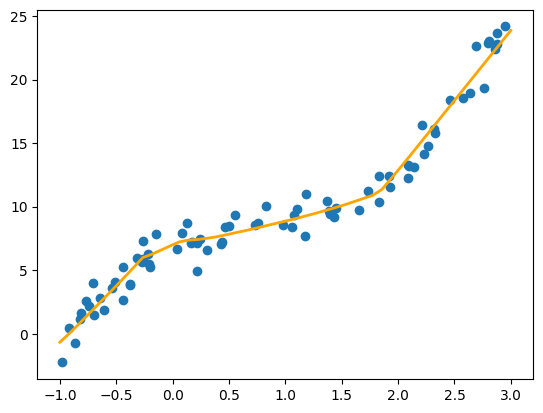

In [15]:
from sklearn.neural_network import MLPRegressor

# Créer une instance de MLPRegressor, un modèle de réseau de neurones pour la régression
# max_iter=5000 spécifie le nombre maximum d'itérations pour l'entraînement
mlp_model = MLPRegressor(max_iter=5000)

# Entraîner le modèle MLP sur les données (xs, noisy_sample_ys)
# xs sont les caractéristiques (features) et noisy_sample_ys sont les valeurs cibles (targets)
# .flatten() est utilisé pour aplatir le tableau noisy_sample_ys en un vecteur 1D
mlp_model.fit(xs, noisy_sample_ys.flatten())

# Utiliser le modèle entraîné pour prédire les valeurs correspondant aux points linéairement espacés (lsp)
predicted_lsp = mlp_model.predict(lsp)

# Tracer les échantillons bruitées
plt.scatter(xs, noisy_sample_ys)

# Tracer les prédictions du modèle MLP en orange avec une épaisseur de ligne de 2
plt.plot(lsp, predicted_lsp, color='orange', lw=2)
plt.show()

MLPRegressor works well for this simple data, but it lacks the more advanced deep learning modeling that PyTorch can offer.
Let's start by achieving a similar result to MLPRegressor, but defining our model ourselves and in PyTorch.

By default, the MLP Regressor makes the following computational graph :
- input gets multiplied by a matrix with 100 parameters, and an additional parameter is added to each values, giving 100 outputs y (shape = (n_samples, 100))
- ReLU is applied to each of these outputs (shape = (n_samples, 100)). The relu function is implemented in PyTorch with torch.nn.functional.relu(x)
- Then this value is multiplied by a matrix to produce a scalar output (again 100 parameters) (shape = (n_samples, 1)) and shifted by an offset.

A quick reminder on matrix multiplication : it is an operation that combines one matrix A of shape (m,n) and a matrix B of shape (n,p) into a matrix C of shape (m,p). In PyTorch (and NumPy), you need to call torch.matmul(A,B) to make this computation.

To make the two big multiplications, we will use one torch tensor of 100 parameters for each multiplication, with the appropriate shape.Create random starting tensors of parameters.

Then implement the asked computation to produce our output from our input. You should debug the operations by ensuring the shapes are correct.


In [16]:
# Créer les paramètres du réseau avec des valeurs initiales aléatoires tirées d'une distribution normale
# Ces paramètres sont les poids (w1, w2) et les biais (b1, b2) du réseau de neurones
# requires_grad=True permet de calculer les gradients pour ces paramètres lors de l'optimisation

# Créer le premier ensemble de poids w1 avec une moyenne de 0 et un écart-type de 0.1
# La taille est (1, 100), ce qui signifie 1 ligne et 100 colonnes
w1 = torch.normal(mean=0., std=0.1, size=(1, 100), requires_grad=True)

# Créer le premier ensemble de biais b1 avec une moyenne de 0 et un écart-type de 0.1
# La taille est (1, 100), correspondant aux biais pour chaque neurone de la première couche
b1 = torch.normal(mean=0., std=0.1, size=(1, 100), requires_grad=True)

# Créer le deuxième ensemble de poids w2 avec une moyenne de 0 et un écart-type de 0.1
# La taille est (100, 1), ce qui signifie 100 lignes et 1 colonne
w2 = torch.normal(mean=0., std=0.1, size=(100, 1), requires_grad=True)

# Créer le deuxième ensemble de biais b2 avec une moyenne de 0 et un écart-type de 0.1
# La taille est (1,), correspondant au biais pour le neurone de sortie
b2 = torch.normal(mean=0., std=0.1, size=(1,), requires_grad=True)

In [17]:
# Définir la fonction f qui représente le réseau de neurones
# Elle prend en entrée un tenseur x et utilise les poids et biais définis précédemment
def f(x, weight1=w1, bias1=b1, weight2=w2, bias2=b2):
    # Calculer la sortie de la première couche en effectuant une multiplication matricielle
    # entre l'entrée x et les poids weight1, puis ajouter le biais bias1
    y1 = torch.matmul(x, weight1) + bias1

    # Appliquer la fonction d'activation ReLU à la sortie de la première couche
    a1 = torch.nn.functional.relu(y1)

    # Calculer la sortie finale en effectuant une multiplication matricielle
    # entre la sortie activée a1 et les poids weight2, puis ajouter le biais bias2
    out = torch.matmul(a1, weight2) + bias2

    # Retourner la sortie finale du réseau
    return out

# Vérifier que lors de l'inférence sur les données, nous obtenons un tenseur de sortie de forme (80, 1)
# Cela correspond à 80 prédictions, une pour chaque échantillon dans torch_xs
f(torch_xs).shape

torch.Size([80, 1])

Now we will mostly use the optimization procedure above to train our network using Pytorch



In [18]:
# Définir le nombre d'itérations pour l'algorithme d'optimisation
n_iter = 2000
# L'optimiseur prend en entrée une liste contenant tous les paramètres du réseau : w1, b1, w2, b2
opt = torch.optim.SGD([w1, b1, w2, b2], lr=0.01)

In [19]:
# Boucle sur le nombre d'itérations spécifié pour l'entraînement du réseau
for i in range(n_iter):
    # Effectuer une passe avant (forward pass) : calculer les prédictions du réseau pour les données d'entrée
    prediction = f(torch_xs, w1, b1, w2, b2)

    # Calculer la perte en utilisant l'erreur quadratique moyenne entre les prédictions et les valeurs cibles bruitées
    loss = torch.mean((prediction - torch_noisy_sample_ys) ** 2)

    # Effectuer une passe arrière (backward pass) : calculer les gradients de la perte par rapport aux paramètres
    loss.backward()

    # Mettre à jour les paramètres du réseau en utilisant l'optimiseur SGD
    opt.step()

    # Réinitialiser les gradients à zéro pour éviter l'accumulation des gradients des itérations précédentes
    opt.zero_grad()

    # Tous les 100 itérations, afficher le numéro de l'itération et la valeur actuelle de la perte
    if not i % 100:
        print(i, loss.item())

tensor([[ 0.0285,  0.1198, -0.0241, -0.0510, -0.1418, -0.1582, -0.0940,  0.0295,
          0.0983, -0.0539, -0.0871, -0.0391,  0.0933, -0.0206,  0.0108,  0.2130,
          0.0709, -0.0362,  0.1060, -0.1765,  0.2158,  0.0091, -0.0020,  0.0301,
         -0.1340,  0.0973,  0.1464, -0.0084,  0.1463,  0.1400,  0.1222,  0.0546,
         -0.0052, -0.0258,  0.0973, -0.0618, -0.0220, -0.1101, -0.1073,  0.1529,
         -0.1441, -0.2331,  0.0507,  0.0553,  0.0354,  0.0201,  0.1384, -0.0511,
          0.0459,  0.0579, -0.0086, -0.0436,  0.0961, -0.1152, -0.1109,  0.1840,
         -0.0866, -0.0812,  0.0430,  0.1122, -0.0682,  0.1677, -0.1722, -0.0077,
          0.0133,  0.0646,  0.0960, -0.1698, -0.0834, -0.0523,  0.0793, -0.0593,
          0.1928, -0.0518, -0.1239, -0.0809,  0.1523,  0.0787, -0.0081, -0.0081,
         -0.0369, -0.1175,  0.1885, -0.0647, -0.0787, -0.2975,  0.0713,  0.1018,
         -0.0434, -0.0975,  0.0472,  0.0628,  0.0734, -0.0530,  0.0560,  0.0385,
          0.0139,  0.0505, -

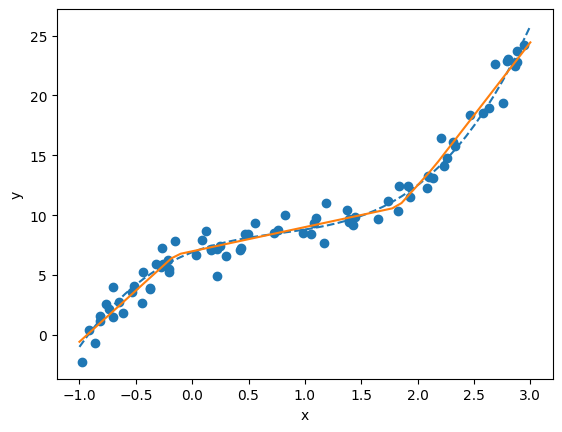

In [ ]:
# Calculer les valeurs prédites par le modèle de réseau de neurones pour les points linéairement espacés (torch_lsp)
# .detach() est utilisé pour détacher le tenseur du graphe de calcul, ce qui signifie que les opérations suivantes
# ne seront pas suivies pour le calcul des gradients
# .numpy() convertit le tenseur PyTorch en un tableau NumPy pour le tracé
predicted_ys = f(torch_lsp).detach().numpy()

# Tracer la fonction de base originale en pointillés
plt.plot(lsp, true_ys, linestyle='dashed')

# Tracer les valeurs prédites par le modèle de réseau de neurones
plt.plot(lsp, predicted_ys)

# Tracer les échantillons bruitées
plt.scatter(xs, noisy_sample_ys)

plt.xlabel('x')
plt.ylabel('y')
plt.show()

Congratulations, you have coded yourself a MLP model ! We have used the computation graph framework.


Now let us make our code prettier (more Pytorch) and more efficient.
First let us refactor the model in the proper way it should be coded, by using the torch.nn.Module class.
You should add almost no new code, just reorganize the one above into a class.

In [ ]:
from torch.nn import Module, Parameter

# Définir une classe MyOwnMLP qui hérite de la classe Module de PyTorch
class MyOwnMLP(Module):

    # Initialiser les paramètres du réseau de neurones dans le constructeur
    def __init__(self):
        # Appeler le constructeur de la classe parente (Module)
        super(MyOwnMLP, self).__init__()

        # Définir les poids et biais de la première couche comme des paramètres de la classe
        # Utiliser une distribution normale pour initialiser les valeurs
        self.w1 = Parameter(torch.normal(mean=0., std=0.1, size=(1, 100)))
        self.b1 = Parameter(torch.normal(mean=0., std=0.1, size=(1, 100)))

        # Définir les poids et biais de la deuxième couche comme des paramètres de la classe
        self.w2 = Parameter(torch.normal(mean=0., std=0.1, size=(100, 1)))
        self.b2 = Parameter(torch.normal(mean=0., std=0.1, size=(1,)))

    # Définir la méthode forward qui spécifie le passage avant du réseau
    def forward(self, x):
        # Calculer la sortie de la première couche
        y1 = torch.matmul(x, self.w1) + self.b1

        # Appliquer la fonction d'activation ReLU à la sortie de la première couche
        a1 = torch.nn.functional.relu(y1)

        # Calculer la sortie finale du réseau
        out = torch.matmul(a1, self.w2) + self.b2
        return out


# Instancier le modèle MyOwnMLP
model = MyOwnMLP()

# Effectuer un passage avant avec les données d'entrée torch_xs
out = model(torch_xs)

# Vérifier la forme du tenseur de sortie
out.shape

torch.Size([80, 1])

Now we are good to also make the data iteration process look like Pytorch code !

We need to define a Dataset object. Once we have this, we can use it to create a DataLoader object

In [ ]:
from torch.utils.data import Dataset, DataLoader


class CustomDataset(Dataset):
    def __init__(self, data_x, data_y):
        self.data_x = data_x
        self.data_y = data_y

    def __len__(self):
        return len(self.data_x)

    def __getitem__(self, idx):
        x = self.data_x[idx]
        y = self.data_y[idx]
        return x, y

In [ ]:
# Créer une instance de CustomDataset avec les données d'entrée torch_xs et les étiquettes torch_noisy_sample_ys
dataset = CustomDataset(data_x=torch_xs, data_y=torch_noisy_sample_ys)

# Créer un DataLoader pour le dataset
# batch_size=10 : le DataLoader fournira des lots (batches) de 10 échantillons à la fois
# num_workers=6 : utiliser 6 processus pour charger les données en parallèle, ce qui peut accélérer le processus
dataloader = DataLoader(dataset=dataset, batch_size=10, num_workers=6)

# Enregistrer le temps de début pour mesurer la durée de l'opération
start = time.time()

# Boucle sur chaque lot de données fourni par le DataLoader
for point in dataloader:
    # On ne fait rien avec les données, on passe simplement à l'itération suivante
    pass

# Calculer et afficher le temps écoulé pour parcourir tous les lots de données
print('Done in pytorch : ', time.time() - start)

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Done in pytorch :  0.32879114151000977


The last thing missing to make our pipeline truly Pytorch is to use a GPU.

In Pytorch it is really easy, you just need to 'move' your tensors to a 'device'.
You can test if a gpu is available and create the appropriate device with the following lines:

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# device = 'cpu'
torch_xs = torch_xs.to(device)
model = model.to(device)

Now we finally have all the elements to make an actual Pytorch complete pipeline !

Create a model, and try to put it on a device.
Create an optimizer with your model's parameters
Make your data into a dataloader

Then use two nested for loops : one for 100 epochs, and in each epoch loop over the dataloader
    Inside the loop, for every batch first put the data on the device
    Then use the semantics of above :
        - model(batch)
        - loss computation and backward
        - gradient step and zero_grad

In [ ]:
n_epochs = 100
model = MyOwnMLP()

# Créer un optimiseur Adam pour ajuster les paramètres du modèle
# Adam est un algorithme d'optimisation qui adapte le taux d'apprentissage pour chaque paramètre
opt = torch.optim.Adam(model.parameters(), lr=0.01)

# Créer une instance de CustomDataset avec les données d'entrée torch_xs et les étiquettes torch_noisy_sample_ys
dataset = CustomDataset(data_x=torch_xs, data_y=torch_noisy_sample_ys)
dataloader = DataLoader(dataset=dataset, batch_size=10, num_workers=0)

loss = 0
# Boucle sur le nombre d'époques spécifié pour l'entraînement
for epoch in range(n_epochs):
    # Boucle sur chaque lot de données fourni par le DataLoader
    for batch_x, batch_y in dataloader:
        # Transférer les données du lot sur le périphérique spécifié (GPU ou CPU)
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)

        # Effectuer une passe avant : calculer les prédictions du modèle pour le lot d'entrée
        prediction = model(batch_x)

        # Calculer la perte en utilisant l'erreur quadratique moyenne entre les prédictions et les valeurs cibles
        loss = torch.mean((prediction - batch_y) ** 2)

        # Effectuer une passe arrière : calculer les gradients de la perte par rapport aux paramètres
        loss.backward()

        # Mettre à jour les paramètres du modèle en utilisant l'optimiseur Adam
        opt.step()

        # Réinitialiser les gradients à zéro pour éviter l'accumulation des gradients des itérations précédentes
        opt.zero_grad()

        # Convertir la perte en une valeur scalaire
        loss = loss.item()
    # Tous les 10 époques, afficher le numéro de l'époque et la valeur actuelle de la perte
    if not epoch % 10:
        print(epoch, loss)

# Transférer le modèle entraîné sur le CPU pour une utilisation ultérieure
model = model.to('cpu')

0 72.10845184326172
10 6.240813255310059
20 5.257849216461182
30 4.795273303985596
40 4.503230094909668
50 4.139009475708008
60 3.60947847366333
70 3.1366219520568848
80 2.6161892414093018
90 2.178925037384033


Finally, we can plot the last model

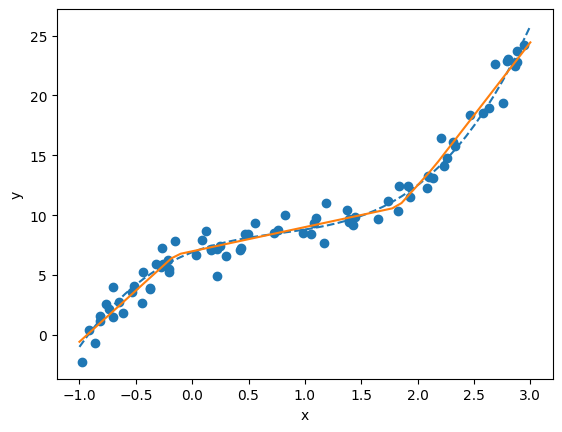

In [ ]:
plt.plot(lsp, true_ys, linestyle='dashed')

# Tracer les valeurs prédites par le modèle de réseau de neurones
plt.plot(lsp, predicted_ys)

# Tracer les échantillons bruitées
plt.scatter(xs, noisy_sample_ys)

plt.xlabel('x')
plt.ylabel('y')
plt.show()

This is the end of the practical part of training neural networks !

Of course, a lot more can be done. On this simple toy data, you can try to illustrate concepts of this class:
- What happens if you use only 10 data points and increase the noise level ?
- Can you observe an overfitting behavior ?
- Can you see the impact of using different optimisers (SGD vs Adam) ?
- ...

Another interesting extension is to use a more advanced (yet manageable dataset), such as FashionMnist.
You can use it through the built-in PyTorch objects: _torchvision.datasets.FashionMNIST_ .
You can install torchvision with _pip install torchvision_ .
More generally, you can follow this tutorial: https://pytorch.org/tutorials/beginner/introyt/trainingyt.html to access the data and have a first model example and training:
- Can you compare MLP architectures with CNNs on this task ?
- Do you see an overfit on this dataset ?
- Does data augmentation helps training on this dataset ?


